In [222]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pyvis.network import Network as net 
import seaborn as sns
import networkx as nx
%matplotlib inline

**To do:**
* Visualize co-occurrence of metrics with heatmap or some network graph?
* Metric labels aggregated by high level process

**Stats stated on 'Papers with code' web site as of 09.06.2020:**

2711 leaderboards • 1578 tasks • 2439 datasets • 24291 papers with code

In [223]:
print('Count of performance metrics before manual curation: {}'.format(direct_property_statistics_per_benchmark.shape[0]))
print('Count of performance metrics after manual assignment to super classes: {}'.format(subproperty_statistics.shape[0]))
print('Number of metrics that could not be assigned (\'Undetermined\'): 271')

Count of performance metrics before manual curation: 812
Count of performance metrics after manual assignment to super classes: 187
Number of metrics that could not be assigned ('Undetermined'): 271


In [224]:
DATA_DIR = 'data'

In [225]:
file_dict = {}
for file in os.listdir(DATA_DIR):
    file_dict[(os.path.splitext(file)[0])] = os.path.join(DATA_DIR, file)

In [438]:
#file_dict

## Total number of papers

In [227]:
total_number_of_papers = pd.read_csv(file_dict['total_number_of_papers'])
total_number_of_papers.head()

,paper_count
0,3883


## Number of papers that have at least one annotated metric

In [228]:
number_of_papers_that_have_at_least_one_annotated_metric = pd.read_csv(file_dict['number_of_papers_that_have_at_least_one_annotated_metric'])
number_of_papers_that_have_at_least_one_annotated_metric.head()

,Unnamed: 0,paper_count
0,0,3883


## Total number of benchmarks

In [229]:
total_number_of_benchmarks = pd.read_csv(file_dict['total_number_of_benchmarks'])
total_number_of_benchmarks.head()

,benchmark_count
0,2298


## Direct property statistics 

In [230]:
direct_property_statistics = pd.read_csv(file_dict['direct_property_statistics'])
direct_property_statistics.head()

,performance_measure_label,performance_measure,benchmark_process_indivdual_count
0,Accuracy,https://ai-strategies.org/ontology/ITO_02411,5284
1,Score,https://ai-strategies.org/ontology/ITO_08816,3742
2,Accuracy (CS),https://ai-strategies.org/ontology/ITO_06723,1230
3,Accuracy (CV),https://ai-strategies.org/ontology/ITO_06722,1107
4,F1,https://ai-strategies.org/ontology/ITO_03697,985


[Text(0, 0.5, 'Performance metric'), Text(0.5, 0, 'Number of benchmarks')]

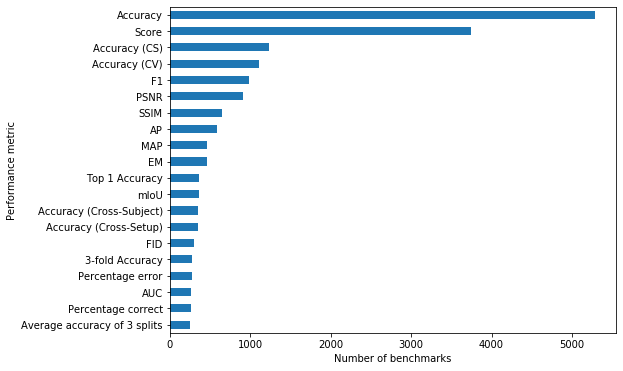

In [231]:
ax = direct_property_statistics.head(20).sort_values(by='benchmark_process_indivdual_count').plot.barh(x='performance_measure_label', y='benchmark_process_indivdual_count', rot=0, figsize=(8, 6), legend=False)
ax.set(ylabel='Performance metric', xlabel='Number of benchmarks')

## Direct property statistics per benchmark

In [232]:
direct_property_statistics_per_benchmark = pd.read_csv(file_dict['direct_property_statistics_per_benchmark'])
direct_property_statistics_per_benchmark.head()

,performance_measure_label,performance_measure,benchmark_count
0,Accuracy,https://ai-strategies.org/ontology/ITO_02411,583
1,F1,https://ai-strategies.org/ontology/ITO_03697,137
2,Score,https://ai-strategies.org/ontology/ITO_08816,98
3,AP,https://ai-strategies.org/ontology/ITO_02616,78
4,AUC,https://ai-strategies.org/ontology/ITO_02593,75


In [233]:
direct_property_statistics_per_benchmark.shape

(812, 3)

[Text(0, 0.5, 'Performance metric'), Text(0.5, 0, 'Number of benchmarks')]

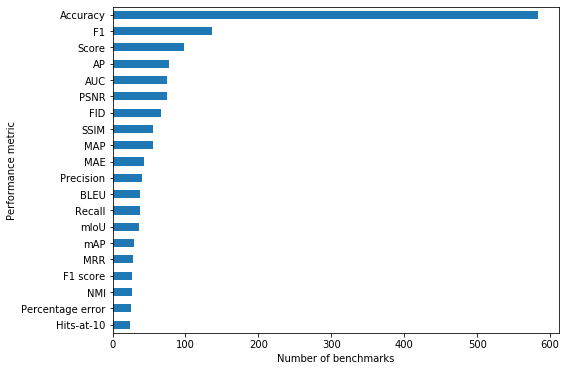

In [234]:
ax = direct_property_statistics_per_benchmark.head(20).sort_values(by='benchmark_count').plot.barh(x='performance_measure_label', y='benchmark_count', rot=0, figsize=(8, 6), legend=None)
ax.set(ylabel='Performance metric', xlabel='Number of benchmarks')

## Number of different metrics per benchmark

In [451]:
number_of_different_metrics_per_benchmark = pd.read_csv(file_dict['number-of-different-metrics-per-benchmark'])
number_of_different_metrics_per_benchmark.head()

,benchmark_label,benchmark,performance_measure_count,performance_measure_labels
0,MSR-VTT - Video Retrieval benchmarking,https://ai-strategies.org/ontology/ITO_07273,10,text-to-video Median Rank;text-to-video R-at-1...
1,COCO test-dev - Keypoint Detection benchmarking,https://ai-strategies.org/ontology/ITO_11334,10,AR;AR50;AR75;ARM;AP;AP50;AP75;APM;APL;ARL
2,"MIT-States, generalized split - Compositional ...",https://ai-strategies.org/ontology/ITO_07763,9,H-Mean;Test AUC top 1;Test AUC top 2;Test AUC ...
3,COCO test-challenge - Keypoint Detection bench...,https://ai-strategies.org/ontology/ITO_11367,9,AR;AR50;AR75;ARM;AP;AP50;AP75;APL;ARL
4,RCV1 - Text Classification benchmarking,https://ai-strategies.org/ontology/ITO_14703,9,nDCG-at-5;nDCG-at-3;nDCG-at-1;Accuracy;P-at-1;...


In [241]:
#number_of_different_metrics_per_benchmark_grouped = number_of_different_metrics_per_benchmark.groupby('performance_measure_count').size()
#number_of_different_metrics_per_benchmark_grouped

In [242]:
#ax = number_of_different_metrics_per_benchmark_grouped.plot.bar(x='high_level_process_label', y='subprocess_performance_measure_count', rot=0, figsize=(6, 4))
# ax.set(ylabel='Count', xlabel='Number of distinct performance metrics per benchmark')

### Co-occurrence matrix

In [243]:
#different_metrics_per_benchmark = number_of_different_metrics_per_benchmark['performance_measure_labels'].str.split(";", expand = True)
#different_metrics_per_benchmark_one_hot = pd.get_dummies(different_metrics_per_benchmark, prefix='', prefix_sep='').groupby(level=0, axis=1).sum()

#cooccurrence_matrix = different_metrics_per_benchmark_one_hot.T.dot(different_metrics_per_benchmark_one_hot)
#cooccurrence_matrix .values[[np.arange(cooccurrence_matrix .shape[0])]*2] = 0
#cooccurrence_matrix


In [217]:
#plt.figure(figsize=(10,10))
#sns.clustermap(cooccurrence_matrix)

In [244]:
#cooccurrence_matrix.loc[:, cooccurrence_matrix.max().sort_values(ascending=False).index]

### Which metrics appear in  isolation?

In [245]:
#cooccurrence_matrix_zero_entries = (cooccurrence_matrix != 0).any()
#print(cooccurrence_matrix_zero_entries)
#lone_metrics = list(cooccurrence_matrix_zero_entries[cooccurrence_matrix_zero_entries != True].index)
#lone_metrics

## Number of different metrics per benchmark, only superproperties

In [400]:
number_of_different_metrics_per_benchmark_superproperties = pd.read_csv(file_dict['number-of-different-metrics-per-benchmark-superproperties'])
number_of_different_metrics_per_benchmark_superproperties.head()

,benchmark_label,benchmark,performance_measure_count,performance_measure_labels
0,COCO test-dev - Keypoint Detection benchmarking,https://ai-strategies.org/ontology/ITO_11334,10,Recall NEW;Precision;Average Path Length;Avera...
1,MSR-VTT - Video Retrieval benchmarking,https://ai-strategies.org/ontology/ITO_07273,10,R-at-K
2,"MIT-States, generalized split - Compositional ...",https://ai-strategies.org/ontology/ITO_07763,9,F1 score NEW;Area under curve (AUC) NEW;Accuracy
3,COCO test-challenge - Keypoint Detection bench...,https://ai-strategies.org/ontology/ITO_11367,9,Recall NEW;Precision;Average Path Length;Avera...
4,RCV1 - Text Classification benchmarking,https://ai-strategies.org/ontology/ITO_14703,9,Normalized Discounted Cumulative Gain;Accuracy...


In [273]:
# Count number of distinct performance measure labels
distinct_counts = [len(i.split(";")) for i in number_of_different_metrics_per_benchmark_superproperties['performance_measure_labels']]

### How often are accuracy and F1 used in isolation?

In [435]:
number_of_different_metrics_per_benchmark_superproperties['performance_measure_labels'].str.contains('Accuracy').value_counts()

False    1513
True      785
Name: performance_measure_labels, dtype: int64

In [422]:
number_of_different_metrics_per_benchmark_superproperties.query('performance_measure_labels == "Accuracy"').count()

benchmark_label               651
benchmark                     651
performance_measure_count     651
performance_measure_labels    651
dtype: int64

In [437]:
number_of_different_metrics_per_benchmark_superproperties['performance_measure_labels'].str.contains("F1 score NEW").value_counts()

False    2038
True      260
Name: performance_measure_labels, dtype: int64

In [420]:
number_of_different_metrics_per_benchmark_superproperties.query('performance_measure_labels == "F1 score NEW"').count()

benchmark_label               156
benchmark                     156
performance_measure_count     156
performance_measure_labels    156
dtype: int64

In [334]:
# add distinct count column
number_of_different_metrics_per_benchmark_superproperties_distinct = number_of_different_metrics_per_benchmark_superproperties.assign(distinct_performance_measure_count=lambda x: [i for i in distinct_counts])
number_of_different_metrics_per_benchmark_superproperties_distinct= number_of_different_metrics_per_benchmark_superproperties_distinct.sort_values(by='distinct_performance_measure_count', ascending=False)
number_of_different_metrics_per_benchmark_superproperties_distinct.head()

,benchmark_label,benchmark,performance_measure_count,performance_measure_labels,distinct_performance_measure_count
20,PWC Leaderboards (restricted) - Scientific Res...,https://ai-strategies.org/ontology/ITO_16527,6,Macro Precision;Macro Recall;Micro Precision;M...,6
30,NTU Hand Digit - Gesture-to-Gesture Translatio...,https://ai-strategies.org/ontology/ITO_11038,6,Mean squared error;Peak signal-to-noise ratio;...,6
29,Senz3D - Gesture-to-Gesture Translation benchm...,https://ai-strategies.org/ontology/ITO_11027,6,Mean squared error;Peak signal-to-noise ratio;...,6
19,"NLP-TDMS (Exp, arXiv only) - Scientific Result...",https://ai-strategies.org/ontology/ITO_16517,6,Macro Precision;Macro Recall;Micro Precision;M...,6
17,ImageNet 64x64 - Image Generation benchmarking,https://ai-strategies.org/ontology/ITO_05884,6,Bits per byte;Inception Score NEW;Bits per dim...,5


In [279]:
number_of_different_metrics_per_benchmark_superproperties_distinct_grouped = number_of_different_metrics_per_benchmark_superproperties_distinct.groupby('distinct_performance_measure_count').size()
number_of_different_metrics_per_benchmark_superproperties_distinct_grouped

distinct_performance_measure_count
1    1775
2     331
3     140
4      37
5      11
6       4
dtype: int64

In [403]:
number_of_different_metrics_per_benchmark_superproperties_distinct_grouped.sum()

2298

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of distinct performance metrics per benchmark')]

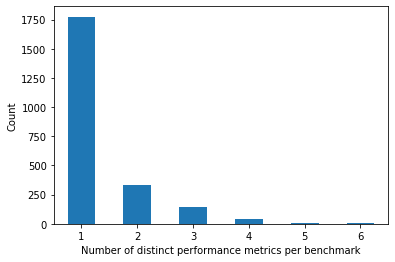

In [280]:
ax = number_of_different_metrics_per_benchmark_superproperties_distinct_grouped.plot.bar(x='high_level_process_label', y='subprocess_performance_measure_count', rot=0, figsize=(6, 4))
ax.set(ylabel='Count', xlabel='Number of distinct performance metrics per benchmark')

In [442]:
different_metrics_per_benchmark_superproperties_distinct = number_of_different_metrics_per_benchmark_superproperties_distinct['performance_measure_labels'].str.split(";", expand = True)
different_metrics_per_benchmark_superproperties_one_hot = pd.get_dummies(different_metrics_per_benchmark_superproperties_distinct, prefix='', prefix_sep='').groupby(level=0, axis=1).sum()

cooccurrence_matrix = different_metrics_per_benchmark_superproperties_one_hot.T.dot(different_metrics_per_benchmark_superproperties_one_hot)
cooccurrence_matrix .values[[np.arange(cooccurrence_matrix.shape[0])]*2] = 0
cooccurrence_matrix

/home/matthias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


,3D percentage of correct keypoints,Absolute relative error NEW,Accuracy,Adjusted Rand Index,Angular Error,Apnea-hypopnoea index,Area under curve (AUC) NEW,Average 3D Error,Average 3D distance of model points,Average Distance Error,...,Unlabeled attachment score,User rating,Value of Information,Variation of information,Vertex-to-vertex metric,Visual surface similarity,Volume similarity,Warping Error,Weighted average precision,nuScenes detection score
3D percentage of correct keypoints,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Absolute relative error NEW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Accuracy,0,0,0,2,0,1,17,0,3,0,...,0,0,0,0,0,0,0,0,2,0
Adjusted Rand Index,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angular Error,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apnea-hypopnoea index,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Area under curve (AUC) NEW,1,0,17,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
Average 3D Error,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Average 3D distance of model points,0,0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Average Distance Error,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [444]:
#cooccurrence_matrix.to_csv('to_gephi.csv', sep = ',')

In [368]:
# Appearing together >10 times
cooccurrence_matrix = cooccurrence_matrix[(cooccurrence_matrix > 10).any()]
cooccurrence_matrix

/home/matthias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,3D percentage of correct keypoints,Absolute relative error NEW,Accuracy,Adjusted Rand Index,Angular Error,Apnea-hypopnoea index,Area under curve (AUC) NEW,Average 3D Error,Average 3D distance of model points,Average Distance Error,...,Unlabeled attachment score,User rating,Value of Information,Variation of information,Vertex-to-vertex metric,Visual surface similarity,Volume similarity,Warping Error,Weighted average precision,nuScenes detection score
Accuracy,0,0,0,2,0,1,17,0,3,0,...,0,0,0,0,0,0,0,0,2,0
Area under curve (AUC) NEW,1,0,17,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
BLEU score NEW,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F1 score NEW,0,0,32,2,0,1,18,0,0,0,...,0,0,0,0,0,0,0,0,2,0
Frechet Inception Distance,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hits-at-k,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Inception Score NEW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Intersection over Union,0,0,16,0,0,0,2,0,2,0,...,0,0,0,0,0,1,0,0,0,0
METEOR,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Macro F1 score,0,0,8,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
# Drop all zero entries
#cooccurrence_matrix = cooccurrence_matrix[(cooccurrence_matrix.T != 0).any()]

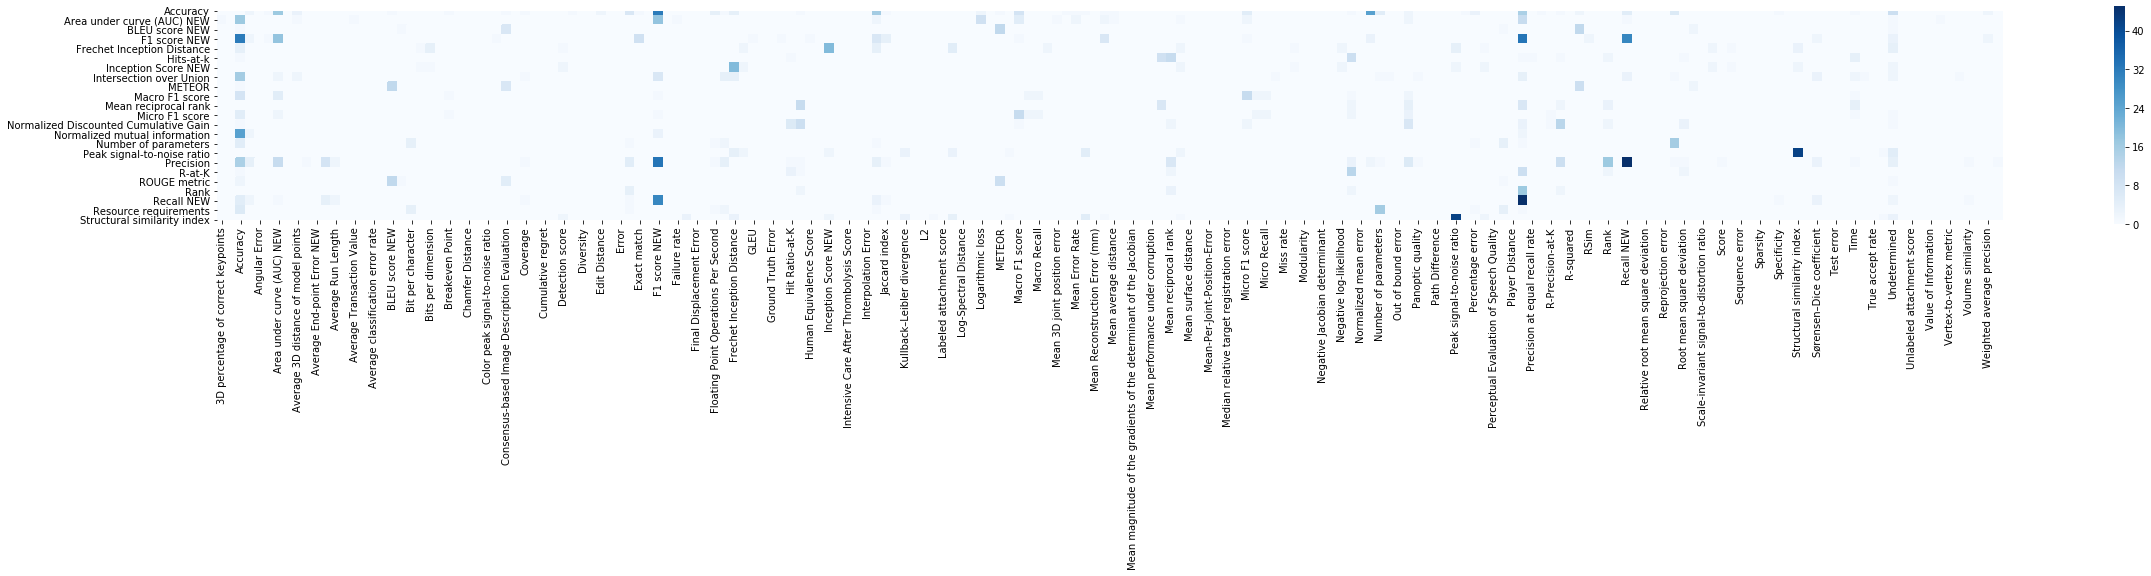

In [372]:
plt.figure(figsize = (40,40))
sns.heatmap(cooccurrence_matrix, square=True, cbar_kws={"shrink": .1}, cmap='Blues')
plt.savefig('test_plot.png')

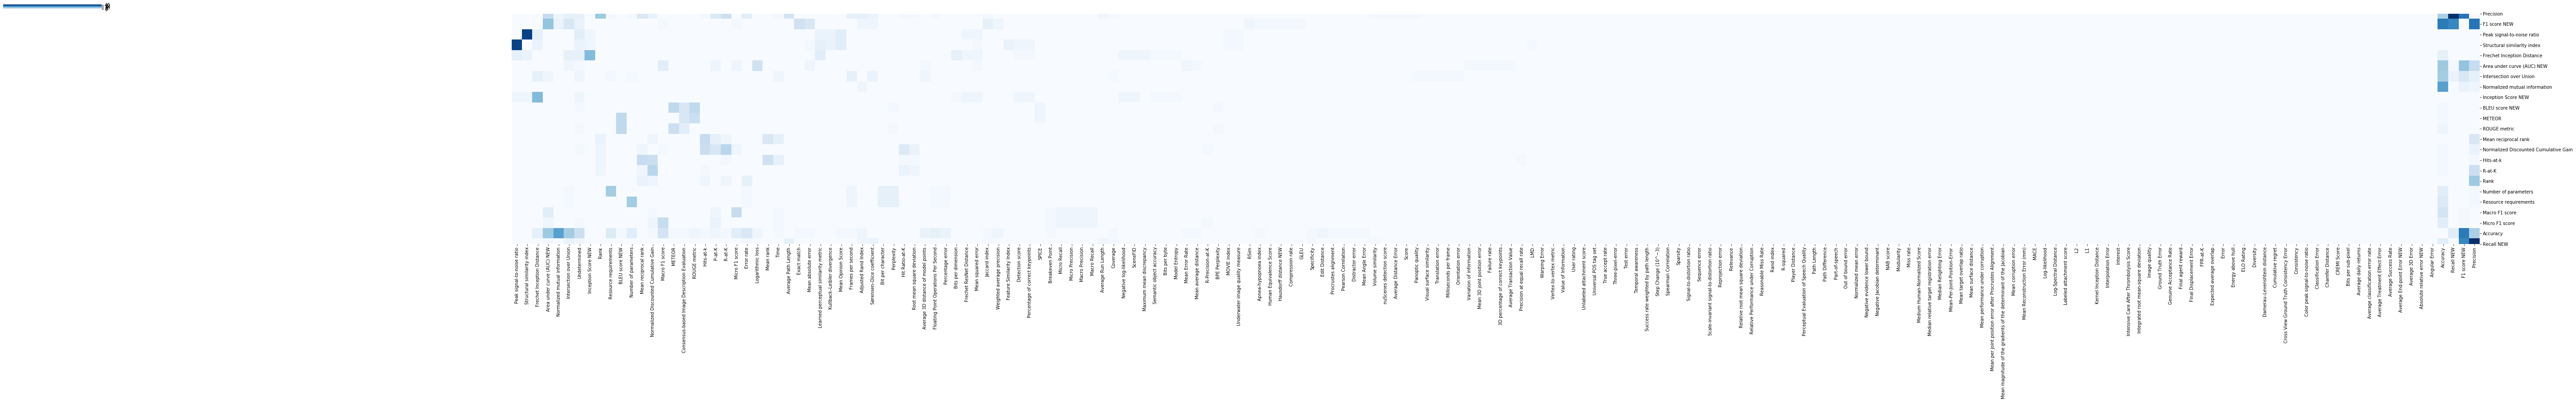

In [397]:
ax = sns.clustermap(cooccurrence_matrix, square=True, cbar_kws={"shrink": .1}, yticklabels=True, xticklabels=True, figsize = (100,10), cmap='Blues')
ax.ax_row_dendrogram.set_visible(False)
ax.ax_col_dendrogram.set_visible(False)
ax.savefig('test_plot2.png')

### Which metrics appear in  isolation?

In [286]:
cooccurrence_matrix_zero_entries = (cooccurrence_matrix != 0).any()
#print(cooccurrence_matrix_zero_entries)
lone_metrics = list(cooccurrence_matrix_zero_entries[cooccurrence_matrix_zero_entries != True].index)
lone_metrics

['Absolute relative error NEW',
 'Angular Error',
 'Average End-point Error NEW',
 'Average Success Rate',
 'Average Treatment Effect Error',
 'Average classification error rate',
 'Average daily returns',
 'Bits per sub-pixel',
 'Chamfer Distance',
 'Classification Error',
 'Color peak signal-to-noise ratio',
 'Consistency',
 'Cumulative regret',
 'Damerau–Levenshtein distance',
 'ELO Rating',
 'Energy above hull',
 'Error',
 'Expected average overlap',
 'FPR-at-K',
 'Final agent reward',
 'Genuine Acceptance Rate',
 'Intensive Care After Thrombolysis Score',
 'Interpolation Error',
 'Kernel Inception Distance',
 'Log-Spectral Distance',
 'MACE',
 'Mean Reconstruction Error (mm)',
 'Mean corruption error',
 'Mean per joint position error after Procrustes Alignment',
 'Mean target overlap ratio',
 'Median Relighting Error',
 'Median relative target registration error',
 'Medium Human-Normalized Score',
 'Modularity',
 'NAB score',
 'Perceptual Evaluation of Speech Quality',
 'Reproject

## Metrics per benchmark

In [399]:
number_of_different_metrics_per_benchmark_superproperties_distinct.head()

,benchmark_label,benchmark,performance_measure_count,performance_measure_labels,distinct_performance_measure_count
20,PWC Leaderboards (restricted) - Scientific Res...,https://ai-strategies.org/ontology/ITO_16527,6,Macro Precision;Macro Recall;Micro Precision;M...,6
30,NTU Hand Digit - Gesture-to-Gesture Translatio...,https://ai-strategies.org/ontology/ITO_11038,6,Mean squared error;Peak signal-to-noise ratio;...,6
29,Senz3D - Gesture-to-Gesture Translation benchm...,https://ai-strategies.org/ontology/ITO_11027,6,Mean squared error;Peak signal-to-noise ratio;...,6
19,"NLP-TDMS (Exp, arXiv only) - Scientific Result...",https://ai-strategies.org/ontology/ITO_16517,6,Macro Precision;Macro Recall;Micro Precision;M...,6
17,ImageNet 64x64 - Image Generation benchmarking,https://ai-strategies.org/ontology/ITO_05884,6,Bits per byte;Inception Score NEW;Bits per dim...,5


In [402]:
print('Mean: {}'.format(np.mean(number_of_different_metrics_per_benchmark_superproperties_distinct.distinct_performance_measure_count)))
print('Median: {}'.format(np.median(number_of_different_metrics_per_benchmark_superproperties_distinct.distinct_performance_measure_count)))
print('Max: {}'.format(np.max(number_of_different_metrics_per_benchmark_superproperties_distinct.distinct_performance_measure_count)))
print('Min: {}'.format(np.min(number_of_different_metrics_per_benchmark_superproperties_distinct.distinct_performance_measure_count)))

Mean: 1.3420365535248042
Median: 1.0
Max: 6
Min: 1


## Number of metrics aggregated by high level process

In [287]:
number_of_metrics_aggregated_by_high_level_process = pd.read_csv(file_dict['number_of_metrics_aggregated_by_high_level_process'])
number_of_metrics_aggregated_by_high_level_process.head()

,Unnamed: 0,high_level_process_label,high_level_process,subprocess_performance_measure_count
0,0,Benchmarking,https://ai-strategies.org/ontology/Benchmarking,3665
1,1,Vision process,https://ai-strategies.org/ontology/ITO_00101,1948
2,2,Natural Language Processing,https://ai-strategies.org/ontology/ITO_00141,802
3,3,Fundamental AI process,https://ai-strategies.org/ontology/ITO_00115,352
4,4,Graph process,https://ai-strategies.org/ontology/ITO_00137,272


[Text(0, 0.5, 'Task'), Text(0.5, 0, 'Number of performance metrics')]

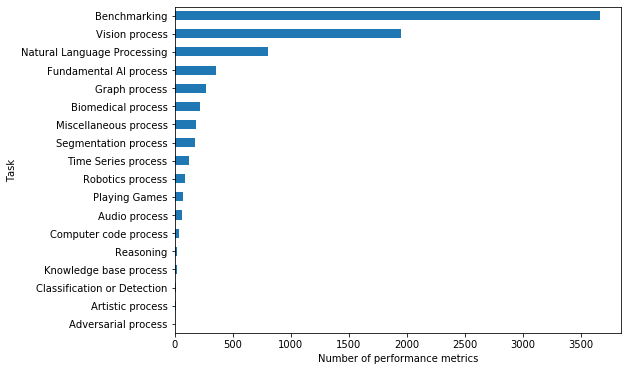

In [288]:
ax = number_of_metrics_aggregated_by_high_level_process.head(20).sort_values(by='subprocess_performance_measure_count').plot.barh(x='high_level_process_label', y='subprocess_performance_measure_count', rot=0, figsize=(8, 6), legend=None)
ax.set(ylabel='Task', xlabel='Number of performance metrics')

## Subproperty statistics

In [289]:
subproperty_statistics = pd.read_csv(file_dict['subproperty_statistics'])
subproperty_statistics.head(20)

,performance_measure_label,performance_measure,benchmark_process_individual_in_subproperty_count
0,Accuracy,https://ai-strategies.org/ontology/ITO_01157,11790
1,Score,https://ai-strategies.org/ontology/ITO_08816,3752
2,Precision,https://ai-strategies.org/ontology/ITO_04547,3336
3,F1 score NEW,https://ai-strategies.org/ontology/ITO_00001,1887
4,Peak signal-to-noise ratio,https://ai-strategies.org/ontology/ITO_00016,944
5,Intersection over Union,https://ai-strategies.org/ontology/ITO_00024,693
6,Structural similarity index,https://ai-strategies.org/ontology/ITO_00045,685
7,Hits-at-k,https://ai-strategies.org/ontology/ITO_00002,553
8,Exact match,https://ai-strategies.org/ontology/ITO_01569,465
9,R-at-K,https://ai-strategies.org/ontology/ITO_00082,427


In [290]:
subproperty_statistics.shape

(187, 3)

[Text(0, 0.5, 'Performance metric'), Text(0.5, 0, 'Count')]

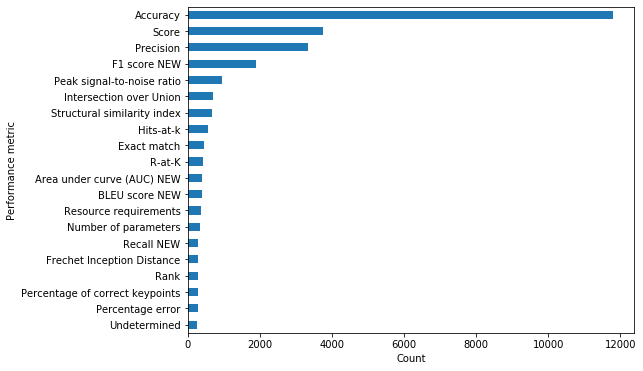

In [291]:
ax = subproperty_statistics.head(20).sort_values(by='benchmark_process_individual_in_subproperty_count').plot.barh(x='performance_measure_label', y='benchmark_process_individual_in_subproperty_count', figsize=(8, 6), legend=None)
ax.set(ylabel='Performance metric', xlabel='Count')

## Suproperty statistics per benchmark

In [326]:
suproperty_statistics_per_benchmark = pd.read_csv(file_dict['suproperty_statistics_per_benchmark'])
suproperty_statistics_per_benchmark.head()
#suproperty_statistics_per_benchmark.query('performance_measure_label == "METEOR"')

,performance_measure_label,performance_measure,benchmark_count
0,Accuracy,https://ai-strategies.org/ontology/ITO_01157,874
1,Precision,https://ai-strategies.org/ontology/ITO_04547,368
2,F1 score NEW,https://ai-strategies.org/ontology/ITO_00001,307
3,R-at-K,https://ai-strategies.org/ontology/ITO_00082,143
4,Area under curve (AUC) NEW,https://ai-strategies.org/ontology/ITO_00006,125


In [313]:
# Remove 'NEW' string from performance_measure_label column for plotting
edited_strings = [i.rstrip('NEW') for i in suproperty_statistics_per_benchmark['performance_measure_label']]
suproperty_statistics_per_benchmark.performance_measure_label = edited_strings


[Text(0, 0.5, 'Performance metric'), Text(0.5, 0, 'Number of benchmarks')]

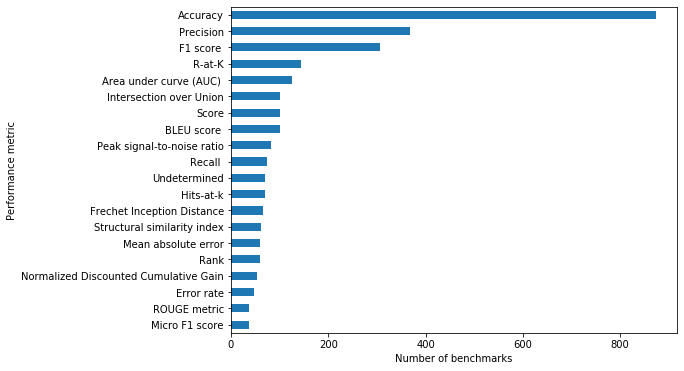

In [314]:
ax = suproperty_statistics_per_benchmark.head(20).sort_values(by='benchmark_count').plot.barh(x='performance_measure_label', y='benchmark_count', rot=0, figsize=(8, 6), legend=None)
ax.set(ylabel='Performance metric', xlabel='Number of benchmarks')

### Rarely used metrics

In [ ]:
#ax = suproperty_statistics_statistics_per_benchmark.tail(20).sort_values(by='benchmark_count').plot.barh(x='performance_measure_label', y='benchmark_count', rot=0, figsize=(10, 8), legend=None)
#ax.set(ylabel='Performance metric', xlabel='Number of benchmarks')

In [294]:
suproperty_statistics_statistics_per_benchmark.tail(20)

,performance_measure_label,performance_measure,benchmark_count
168,Mean Angle Error,https://ai-strategies.org/ontology/ITO_04157,1
169,Mean Reconstruction Error (mm),https://ai-strategies.org/ontology/ITO_04870,1
170,Path Length,https://ai-strategies.org/ontology/ITO_05090,1
171,Step Change (10^−3),https://ai-strategies.org/ontology/ITO_05092,1
172,Path Difference,https://ai-strategies.org/ontology/ITO_05093,1
173,Player Distance,https://ai-strategies.org/ontology/ITO_05094,1
174,Warping Error,https://ai-strategies.org/ontology/ITO_05493,1
175,CREMI Score,https://ai-strategies.org/ontology/ITO_05631,1
176,Model Entropy,https://ai-strategies.org/ontology/ITO_05708,1
177,Interpolation Error,https://ai-strategies.org/ontology/ITO_07233,1


## Time span of publications covered by PWC

In [295]:
time_span_of_publications_covered_by_PWC = pd.read_csv(file_dict['time_span_of_publications_covered_by_PWC'])
# Convert 'date' column to datetime
time_span_of_publications_covered_by_PWC['date'] = pd.to_datetime(time_span_of_publications_covered_by_PWC['date'])

In [296]:
# Add extra columns for week/year and year
#time_span_of_publications_covered_by_PWC['week/year'] = time_span_of_publications_covered_by_PWC['date'].apply(lambda x: "%d/%d" % (x.week, x.year))
time_span_of_publications_covered_by_PWC['year'] = time_span_of_publications_covered_by_PWC['date'].apply(lambda x: "%d" % (x.year))

In [297]:
time_span_of_publications_covered_by_PWC_grouped_by_year = time_span_of_publications_covered_by_PWC.groupby('year').size()
#time_span_of_publications_covered_by_PWC_grouped_by_year

[Text(0, 0.5, 'Number of publications'), Text(0.5, 0, 'Year')]

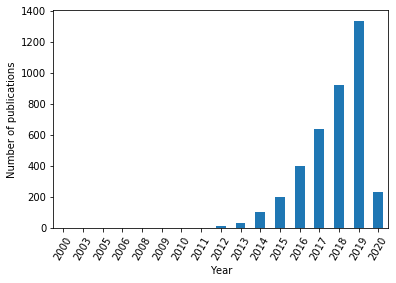

In [298]:
ax = time_span_of_publications_covered_by_PWC_grouped_by_year.plot.bar(x='lab', y='val', rot=60)
ax.set(ylabel='Number of publications', xlabel='Year')

## Number of benchmarks per high level process

In [449]:
number_of_benchmarks_per_high_level_process = pd.read_csv(file_dict['number_of_benchmarks_per_high_level_process'])
# Remove task 'Segmentation process' and 'benchmarking'
number_of_benchmarks_per_high_level_process = number_of_benchmarks_per_high_level_process.drop(index=[0,6])
number_of_benchmarks_per_high_level_process.head()

,high_level_process_label,high_level_process,benchmark_count
1,Vision process,https://ai-strategies.org/ontology/ITO_00101,1200
2,Natural Language Processing,https://ai-strategies.org/ontology/ITO_00141,491
3,Fundamental AI process,https://ai-strategies.org/ontology/ITO_00115,267
4,Graph process,https://ai-strategies.org/ontology/ITO_00137,161
5,Biomedical process,https://ai-strategies.org/ontology/ITO_00126,131


[Text(0, 0.5, 'Process'), Text(0.5, 0, 'Number of benchmarks')]

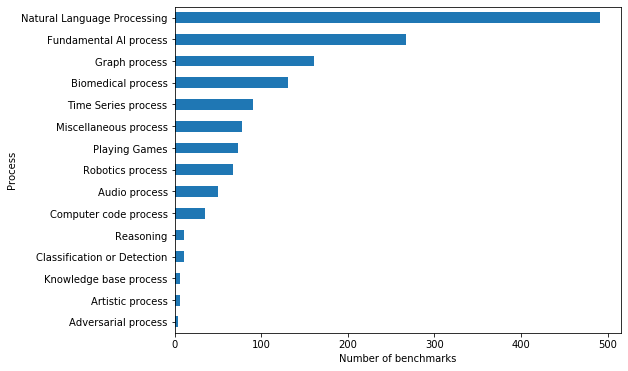

In [450]:
ax = number_of_benchmarks_per_high_level_process[1:].sort_values(by='benchmark_count').plot.barh(x='high_level_process_label', y='benchmark_count', rot=0, figsize=(8, 6), legend=None)
ax.set(ylabel='Process', xlabel='Number of benchmarks')